<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Yassi\AppData\Local\Temp\ipykernel_15604\2060430960.py:16: SyntaxWarning: invalid escape sequence '\p'
  qc.barrier(label='$\psi_{0}$')
C:\Users\Yassi\AppData\Local\Temp\ipyke

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

{'00': 259, '11': 245, '10': 238, '01': 258}


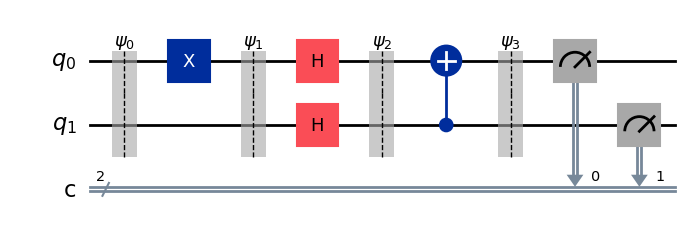

In [1]:
#Task displaying
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
#from matplotlibDrawer import matplotlib
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

# your code is here
#
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q,c)

qc.barrier(label='$\psi_{0}$')
display(Statevector(qc).draw('latex', prefix='\psi_{0} = '))
qc.x(q[0])

qc.barrier(label='$\psi_{1}$')
display(Statevector(qc).draw('latex', prefix='\psi_{1} ='))

qc.h(q)

qc.barrier(label='$\psi_{2}$')
display(Statevector(qc).draw('latex', prefix='\psi_{2} = '))

qc.cx(q[1],q[0])
qc.barrier(label='$\psi_{3}$')
display(Statevector(qc).draw('latex', prefix='\psi_{3} = '))

qc.measure(q,c)
job=AerSimulator().run(qc,shots=1000)
counts= job.result().get_counts(qc)
print(counts)
qc.draw(output='mpl')


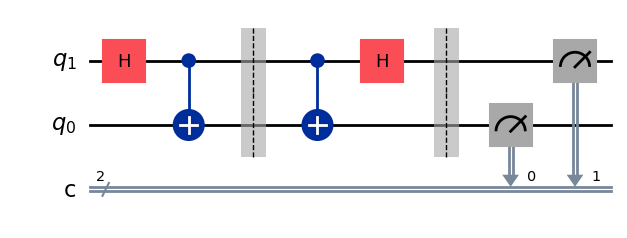

00 --> {'00': 100}


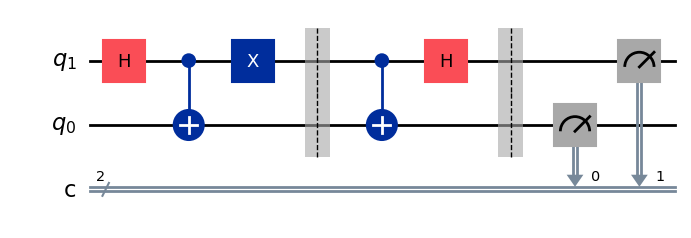

01 --> {'01': 100}


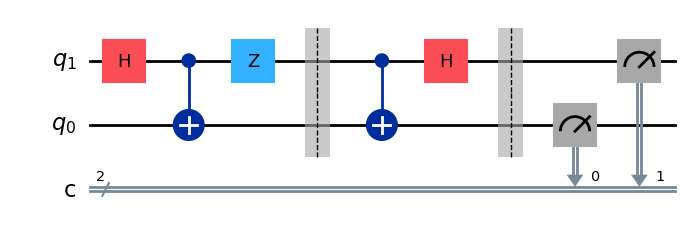

10 --> {'10': 100}


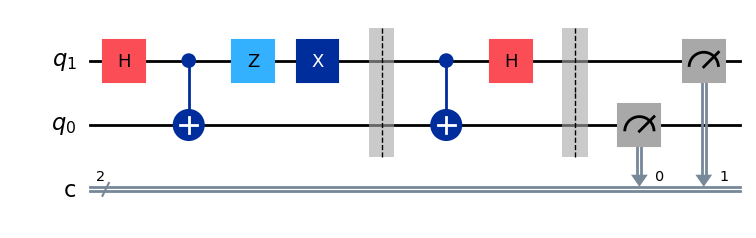

11 --> {'11': 100}


In [1]:
#Task dense Coding
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Asja's qubit
    if pair[0]=='1': 
        qc.z(q[1])
    
    # if b is 1, then apply x-gate (NOT) to Asja's qubit
    if pair[1]=='1': 
        qc.x(q[1])
    
    # Asja sends her qubit to Balvis
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = AerSimulator().run(qc,shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)

<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Yassi\AppData\Local\Temp\ipykernel_33712\1216821421.py:13: SyntaxWarning: invalid escape sequence '\p'
  display(sv.draw('latex', prefix='\psi_i = '))
C:\Users\Yassi\AppData\Local\Temp\ipykernel_33712\1216821421.py:51: SyntaxWarning: invalid escape sequence '\p'
  display(current_quantum_state.draw('latex', prefix=' \psi_f = '))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

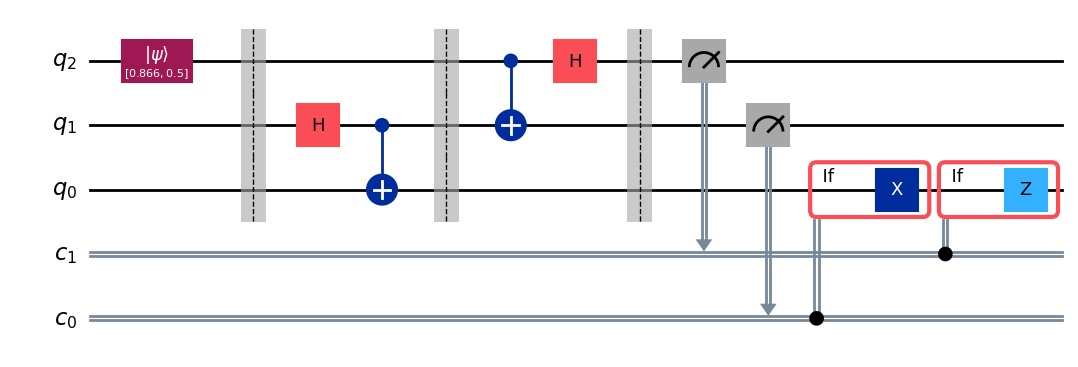

In [1]:
#Teleportation

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.quantum_info import Statevector, random_statevector
import numpy as np

q = QuantumRegister(3,"q") # quantum register with 2 qubits
c = ClassicalRegister(2,"c") # classical register with 2 bits
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

sv=Statevector([np.sqrt(3/4),1/2])
display(sv.draw('latex', prefix='\psi_i = '))

qc.initialize(sv, q[2])
qc.barrier()

##Entanglement State
qc.h(q[1])
qc.cx(q[1], q[0])
qc.barrier()

#Psi >> q[2]
#Alice >>q[1]
#Bob >>q[0]

##Encoding by Alice
qc.cx(q[2], q[1])
qc.h(q[2])
qc.barrier()

qc.measure(q[2],c[1])
qc.measure(q[1],c[0])


##Decoding by Bob

#oldQiskit
#qc.c_if()


with qc.if_test((c[0],1)):
    qc.x(q[0])


with qc.if_test((c[1],1)):
    qc.z(q[0])

job = StatevectorSimulator().run(qc,optimization_level=0,shots=100)
current_quantum_state=job.result().get_statevector(qc)
display(current_quantum_state.draw('latex', prefix=' \psi_f = '))

qc.draw(output='mpl',reverse_bits=True,cregbundle=False)

<IPython.core.display.Latex object>

{'00': 1000}


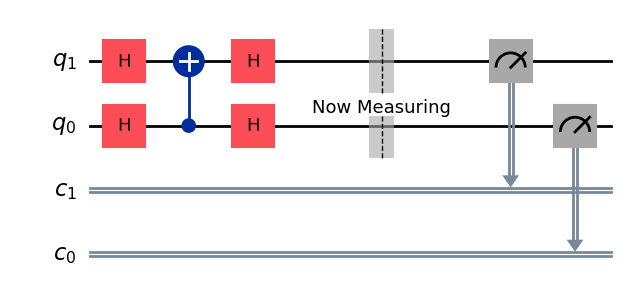

<IPython.core.display.Latex object>

{'11': 1000}


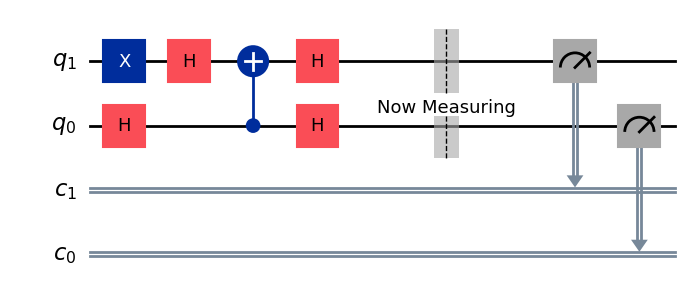

<IPython.core.display.Latex object>

{'01': 1000}


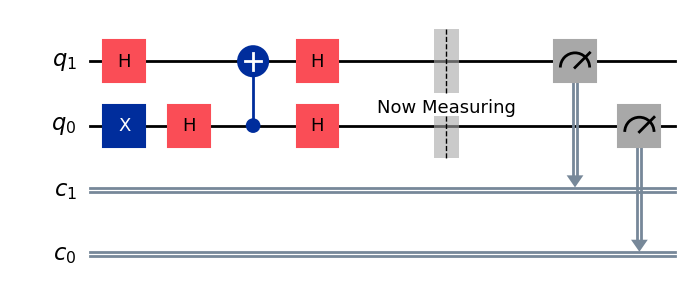

<IPython.core.display.Latex object>

{'10': 1000}


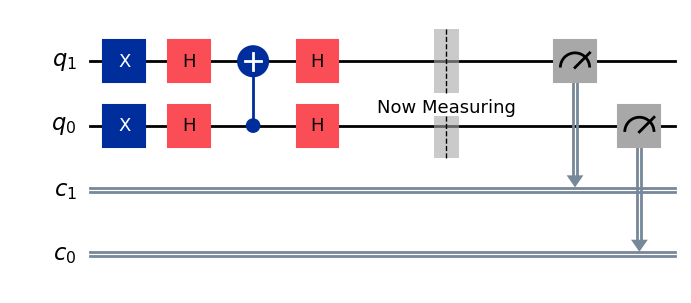

In [5]:
#Assignment Phase Kickback
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.quantum_info import Statevector, random_statevector
import numpy as np
 
all_pairs = ['00','01','10','11']

for pairs in all_pairs:
    q = QuantumRegister(2,"q")
    c = ClassicalRegister(2,"c")
    qc = QuantumCircuit(q,c)
    
    if pairs[0] == '1':  
        qc.x(q[0])
    if pairs[1] == '1': 
        qc.x(q[1])
        
    
    qc.h(q) #Apply hadmard for both qubits
    qc.cx(q[0],q[1]) #Apply CNOT gate
    qc.h(q) 
    statevectorjob = StatevectorSimulator().run(qc,optimization_level=0,shots=1000)
    current_quantum_state=statevectorjob.result().get_statevector(qc)
    display(current_quantum_state.draw('latex'))
    qc.barrier(label='Now Measuring')
    qc.measure(q[1],c[1])#Measurment_1
    qc.measure(q[0],c[0])#Measurment_0
    job = AerSimulator().run(qc, shots=1000)
    counts = job.result().get_counts(qc)
    print(counts)
   
    display(qc.draw(output='mpl',reverse_bits=True,cregbundle=False))